## High Peak Student Experiment by Report Score
#### Createrion of high peak student:
1. Have 1 subject that appeals than the other subject
2. For now, I defined high peak which there's one score > average of all subject score

#### Objective:
1. Prove Machine Learning models can predict result through accuracy
2. Find the best classification method through various models

In [65]:
import pandas as pd
import numpy as np

In [77]:
# import pandas
df = pd.read_csv('dummy_data_report.csv')
df.head()

,math,speaking,reading,listening,sport
0,80,90,60,80,100
1,50,100,40,60,70
2,60,80,40,50,70
3,70,80,70,80,75
4,85,75,80,90,85


In [78]:
# add column 'target' which filled with 0:'well rounded' and 1: 'high peak'
df['average'] = (df['math'] + df['speaking'] + df['reading'] + df['listening'] + df['sport']) / 5
df['max'] = df.max(axis=1)
df

,math,speaking,reading,listening,sport,average,max
0,80,90,60,80,100,82.0,100.0
1,50,100,40,60,70,64.0,100.0
2,60,80,40,50,70,60.0,80.0
3,70,80,70,80,75,75.0,80.0
4,85,75,80,90,85,83.0,90.0
5,78,85,80,82,80,81.0,85.0
6,80,70,80,70,80,76.0,80.0
7,85,80,85,80,85,83.0,85.0
8,95,90,100,95,90,94.0,100.0
9,75,76,77,78,79,77.0,79.0


In [79]:
df['is_hp'] = df['average'] + 20 < df['max']
df

,math,speaking,reading,listening,sport,average,max,is_hp
0,80,90,60,80,100,82.0,100.0,False
1,50,100,40,60,70,64.0,100.0,True
2,60,80,40,50,70,60.0,80.0,False
3,70,80,70,80,75,75.0,80.0,False
4,85,75,80,90,85,83.0,90.0,False
5,78,85,80,82,80,81.0,85.0,False
6,80,70,80,70,80,76.0,80.0,False
7,85,80,85,80,85,83.0,85.0,False
8,95,90,100,95,90,94.0,100.0,False
9,75,76,77,78,79,77.0,79.0,False


In [80]:
df['is_hp'] = df['is_hp'].replace({False: 0, True: 1})
df = df[['math', 'speaking', 'reading', 'listening', 'sport', 'is_hp']]
df

,math,speaking,reading,listening,sport,is_hp
0,80,90,60,80,100,0
1,50,100,40,60,70,1
2,60,80,40,50,70,0
3,70,80,70,80,75,0
4,85,75,80,90,85,0
5,78,85,80,82,80,0
6,80,70,80,70,80,0
7,85,80,85,80,85,0
8,95,90,100,95,90,0
9,75,76,77,78,79,0


In [84]:
# export for next research
df.to_csv('preprocessed_file.csv', sep=',', index=False)

Shape of your Data Set: (49, 5)
Classifying variables in data set...
    5 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 15
Time to run AutoViz (in seconds) = 8.944


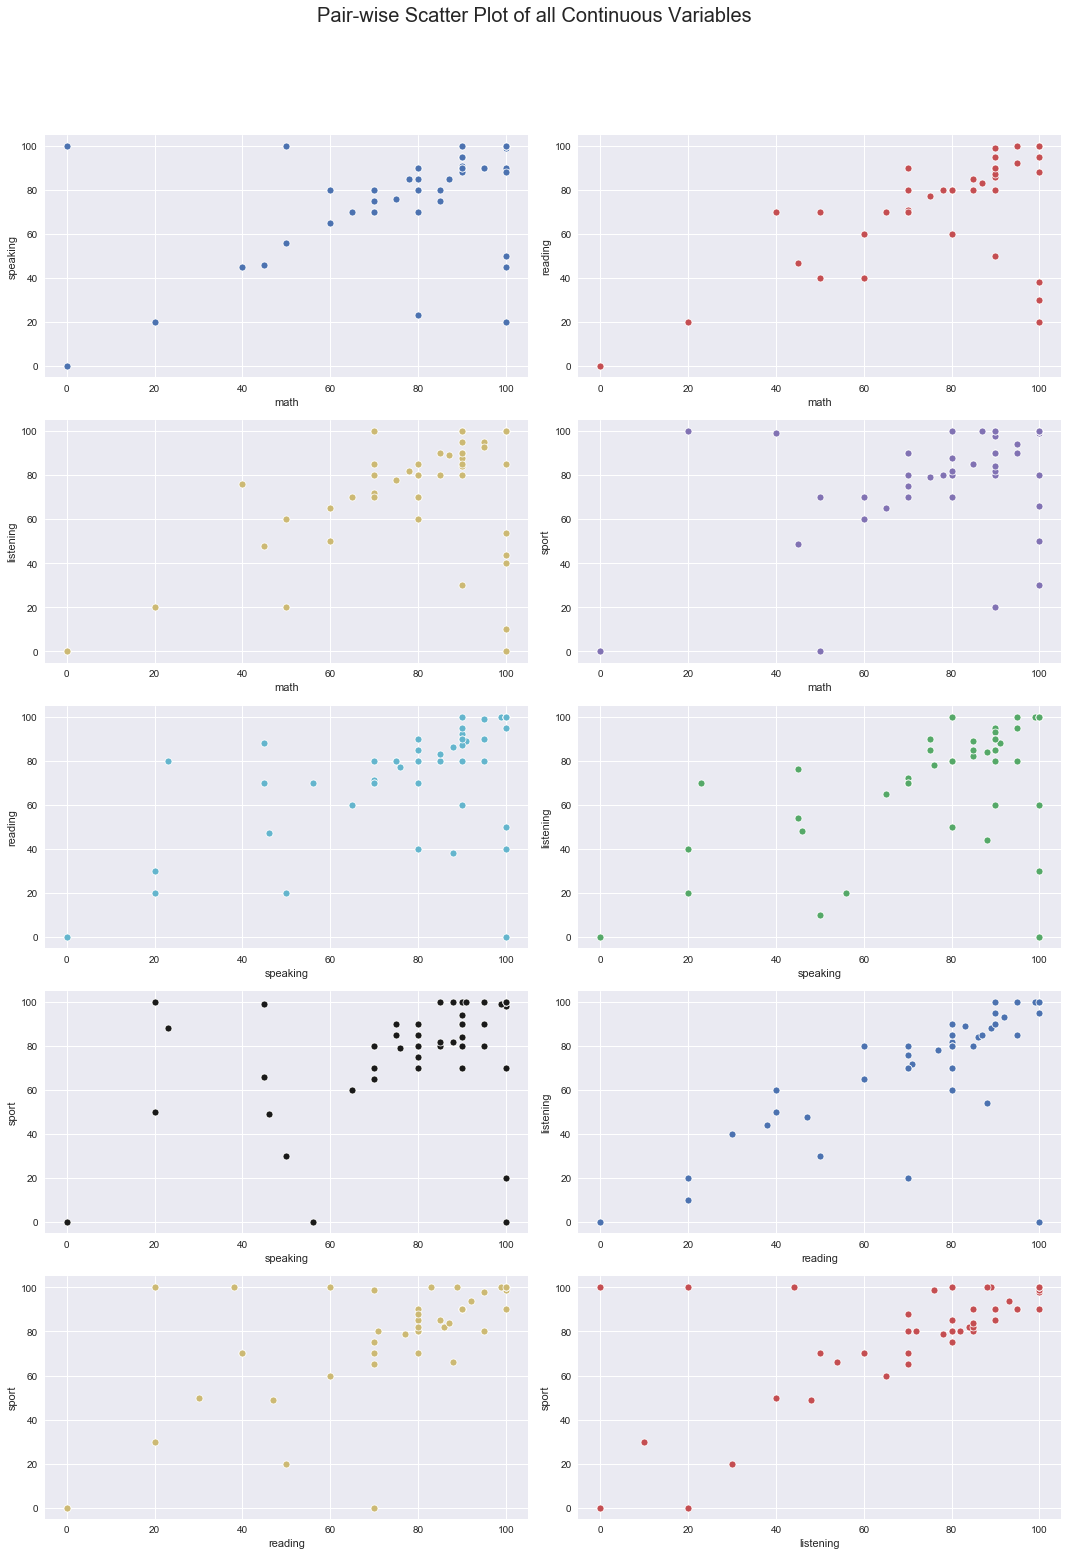

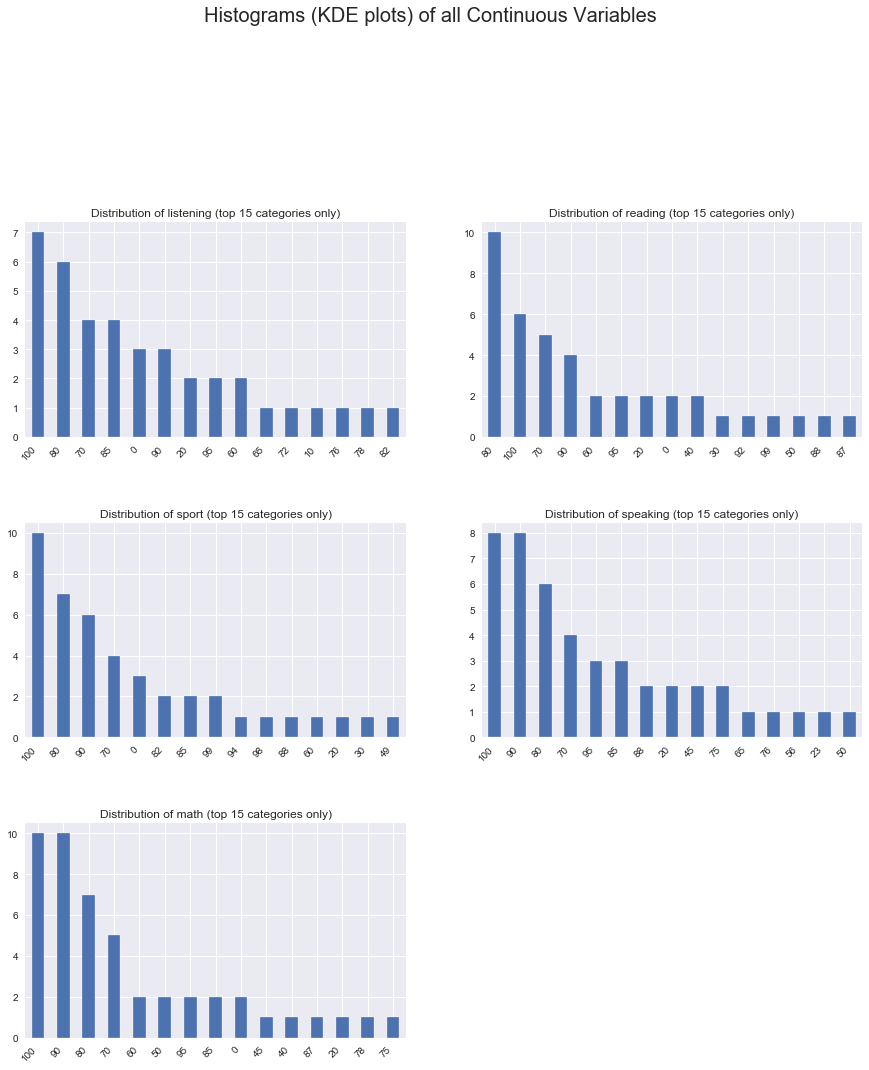

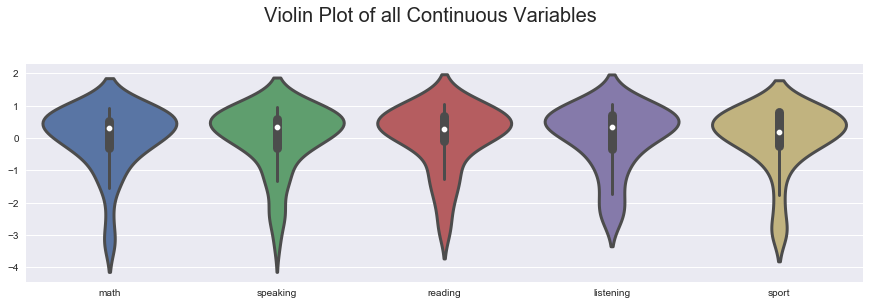

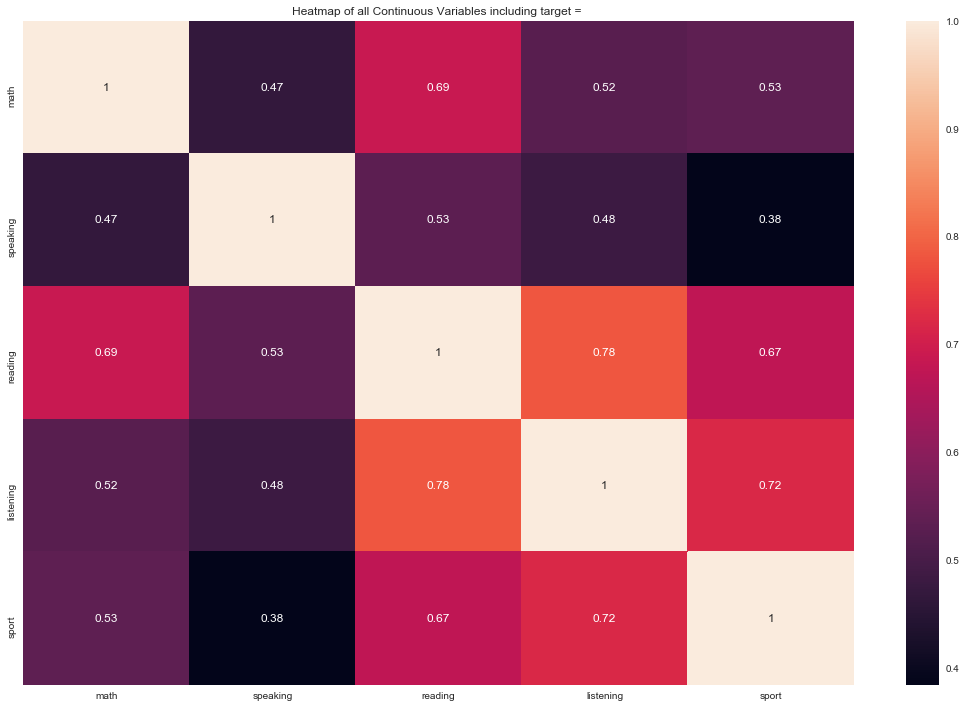

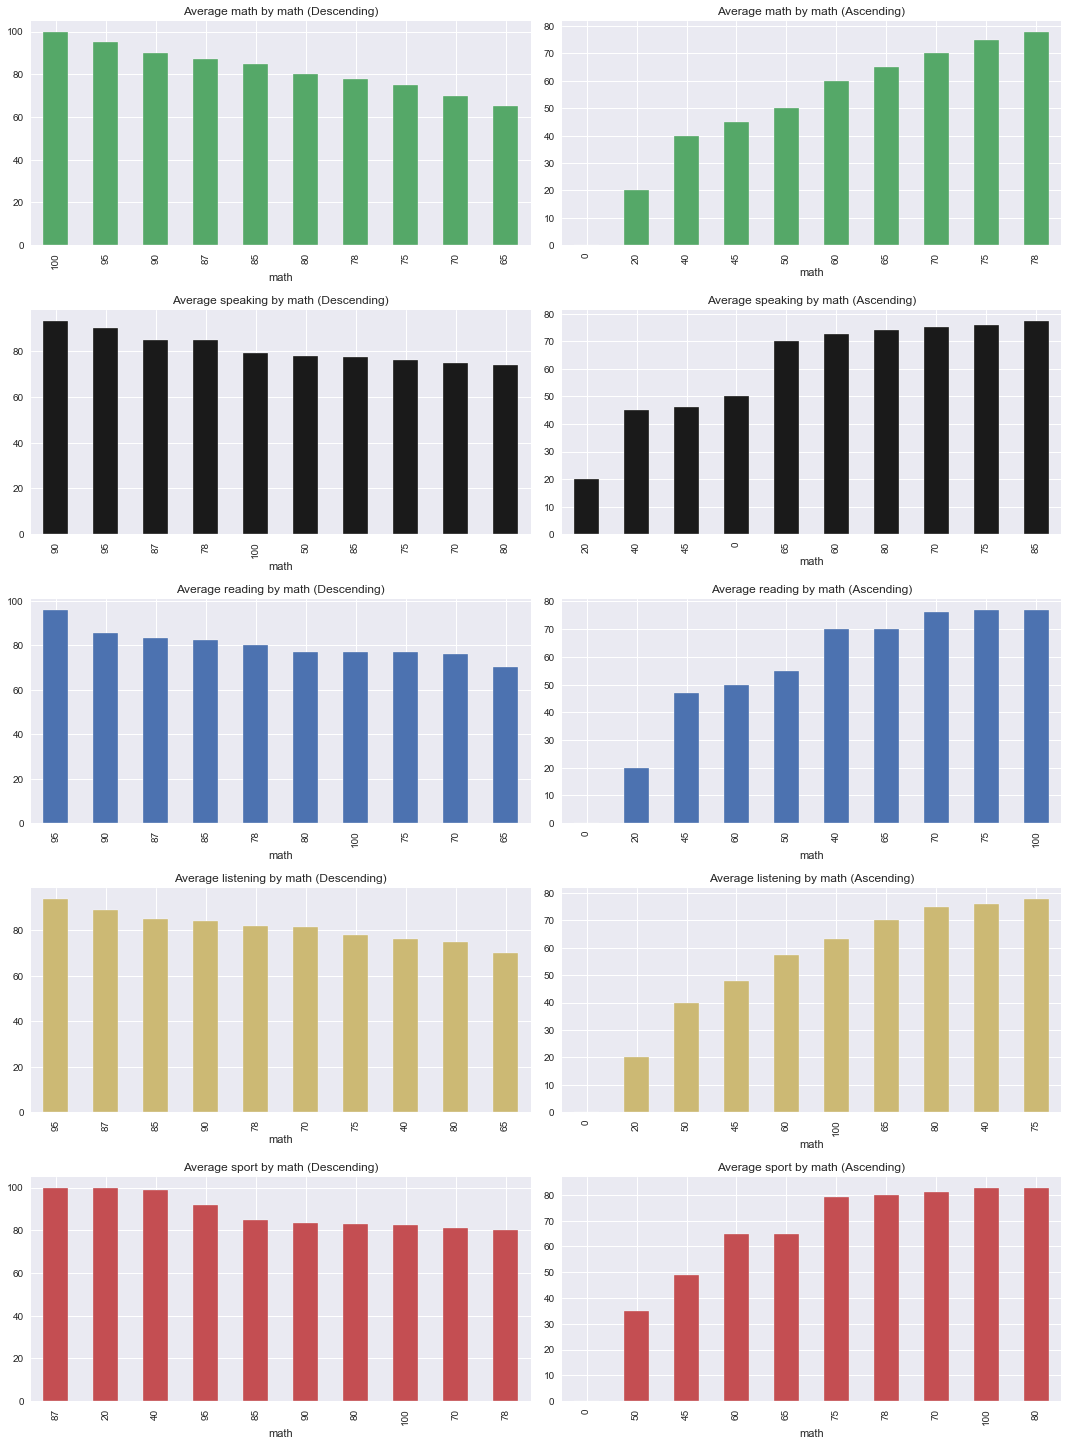

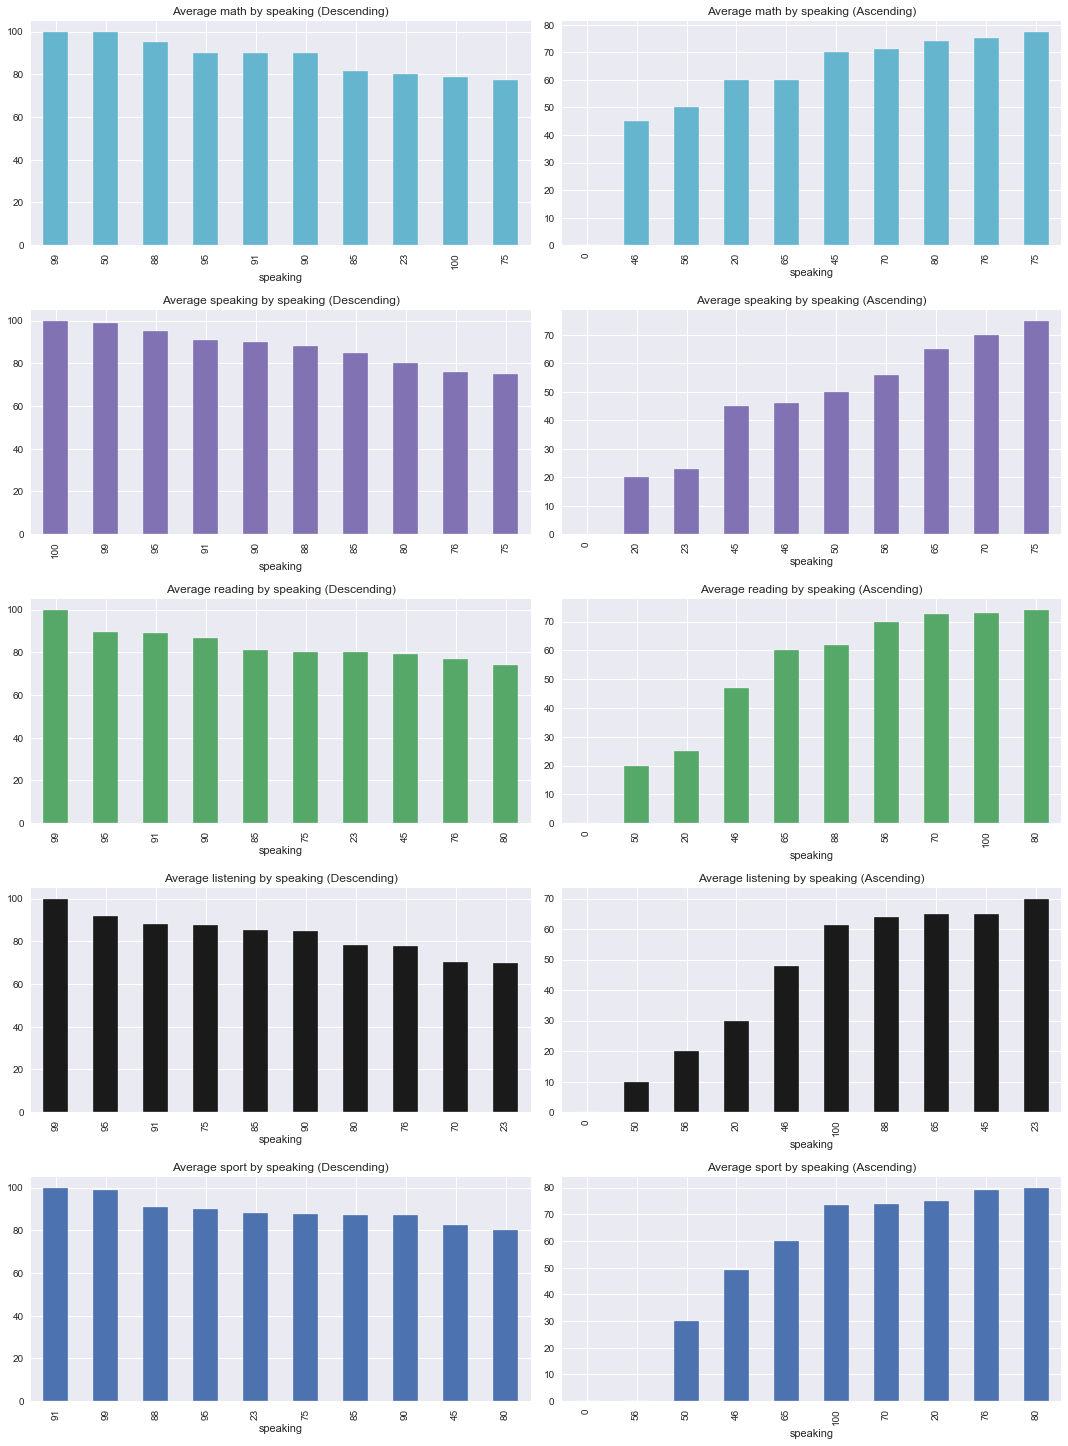

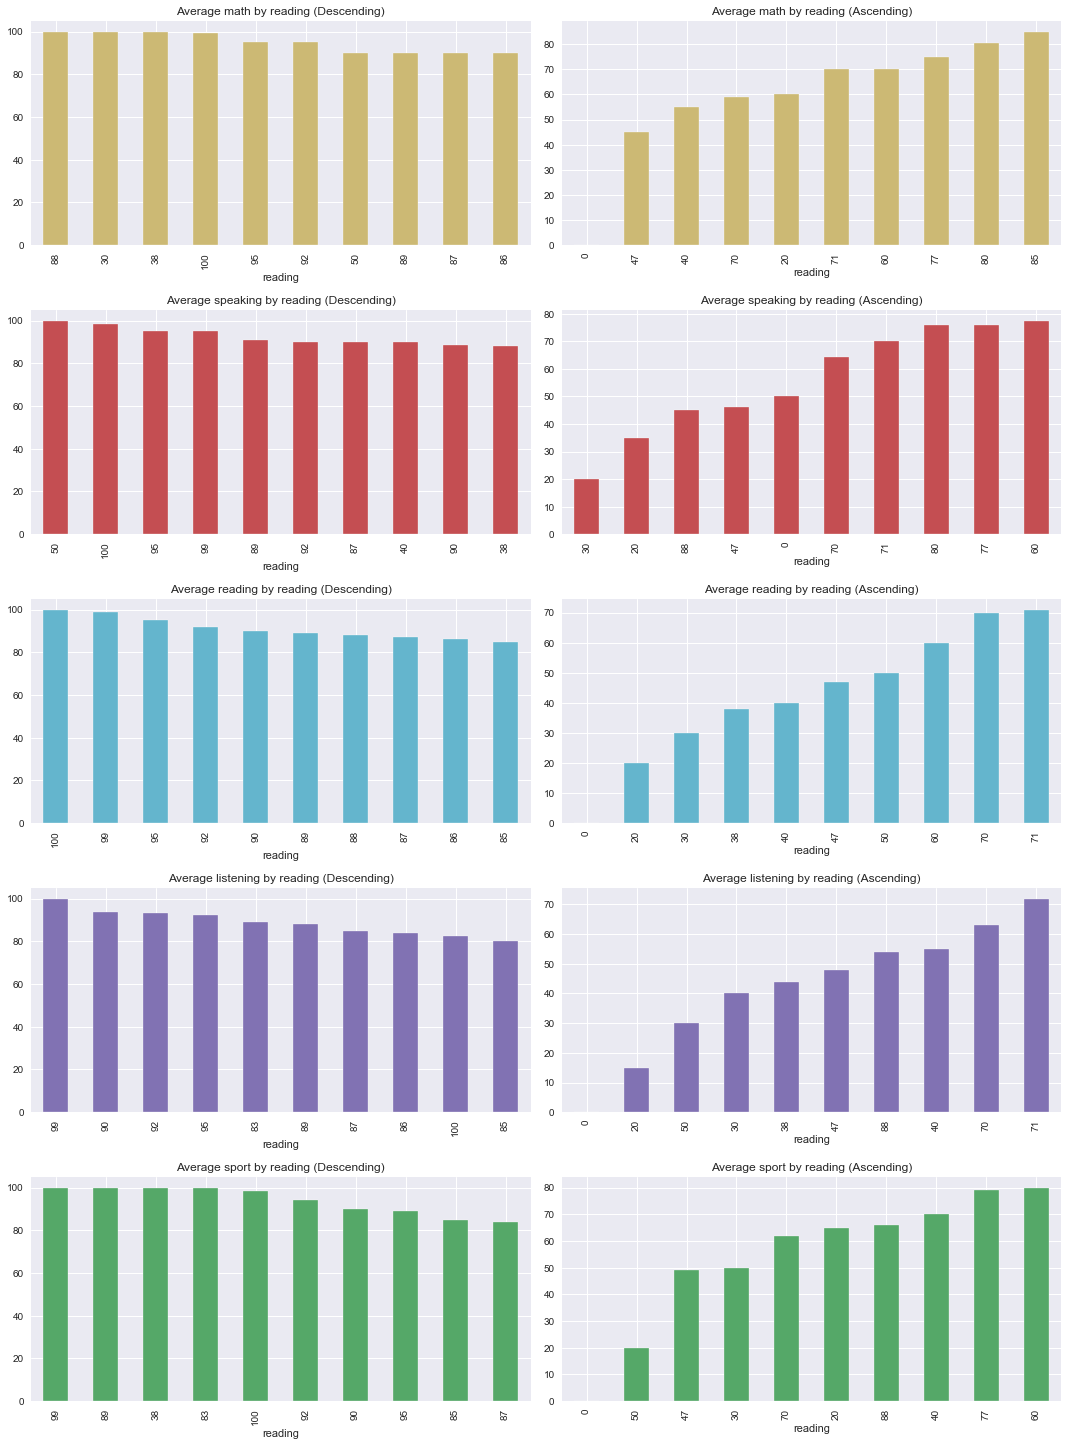

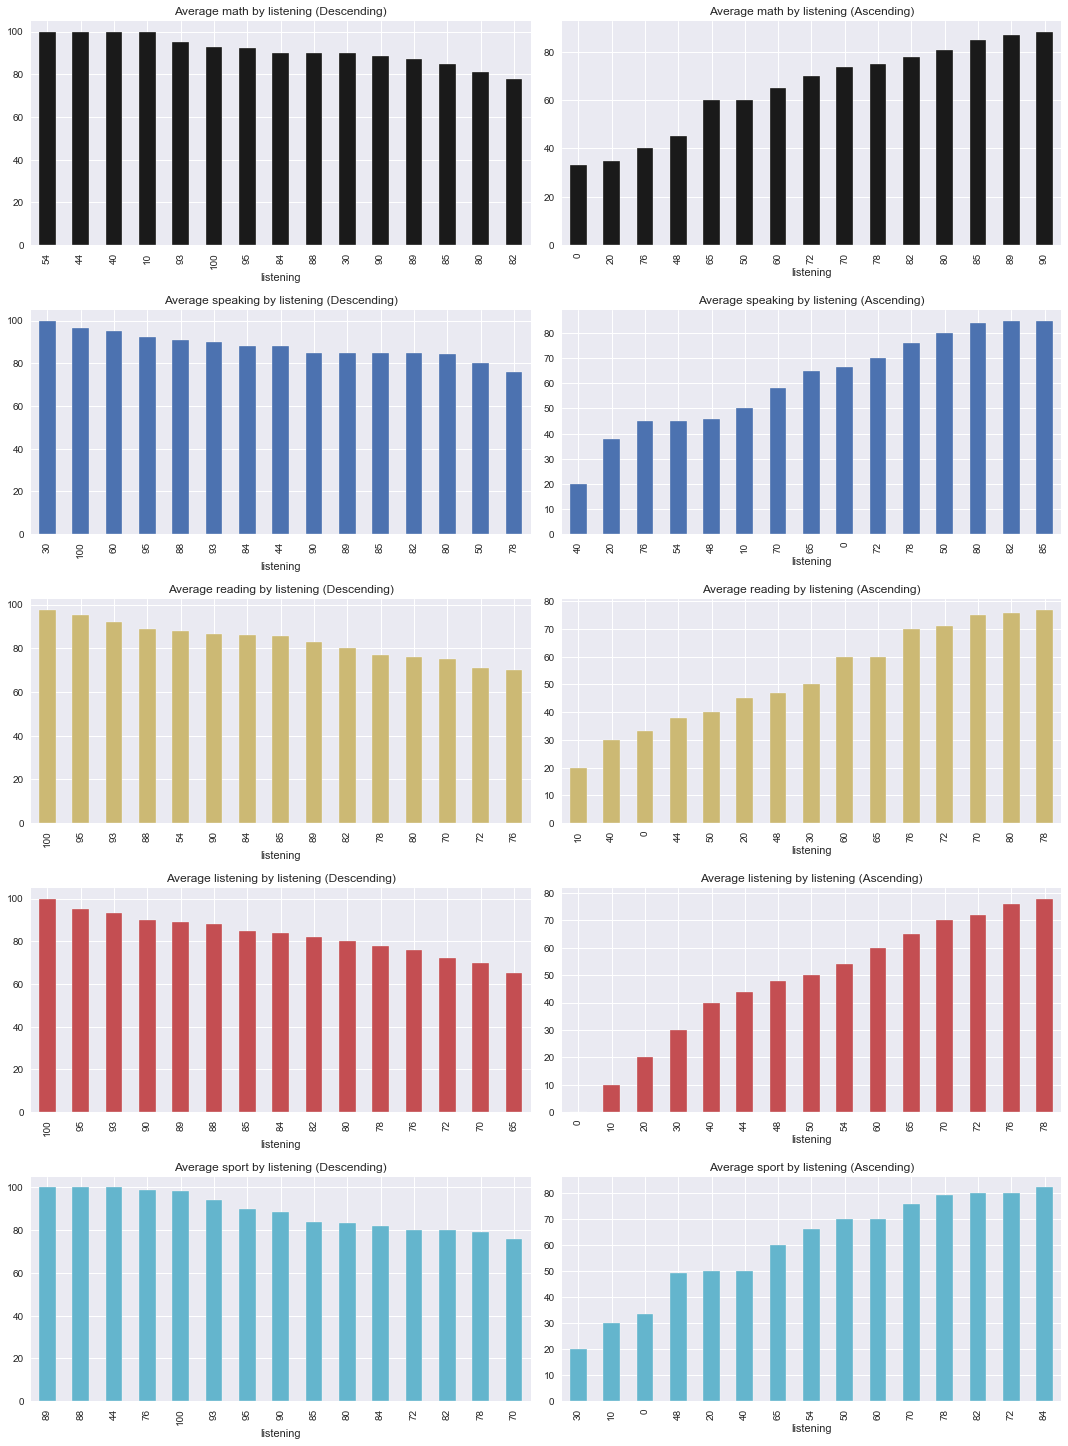

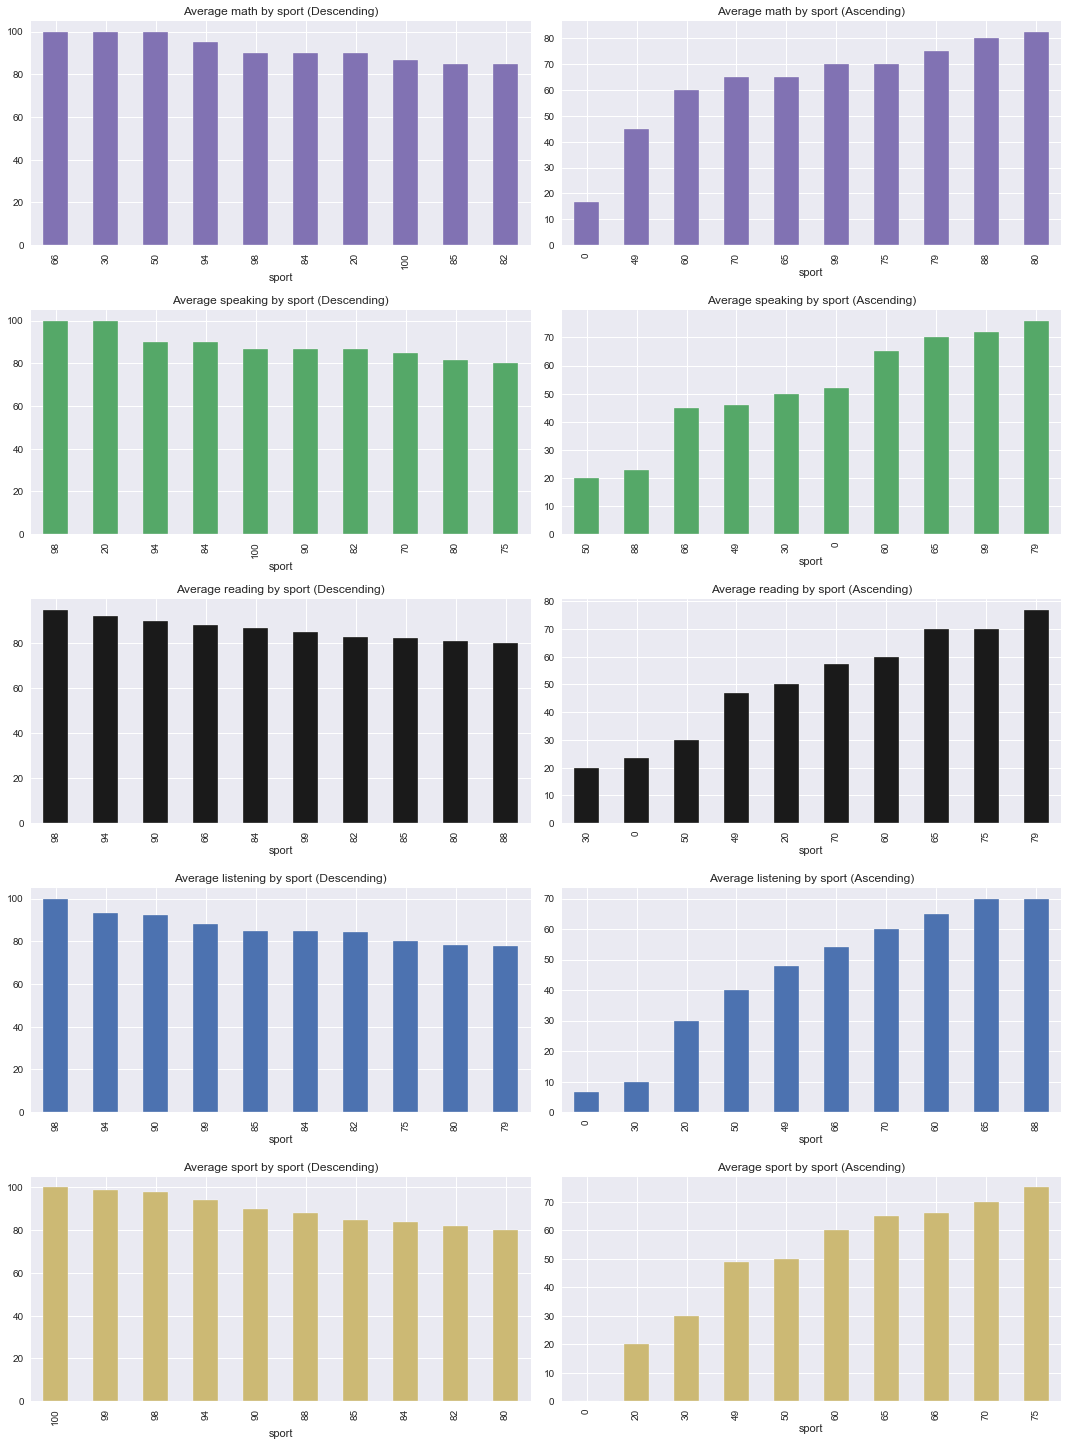

In [38]:
#autoviz
from autoviz.AutoViz_Class import AutoViz_Class #import Autoviz class
AV = AutoViz_Class() #instantiate the AutoViz class

viz = AV.AutoViz('dummy_data_report.csv') #, depVar='Sales'

In [86]:
#check point
df = pd.read_csv('preprocessed_file.csv')
df.head()

,math,speaking,reading,listening,sport,is_hp
0,80,90,60,80,100,0
1,50,100,40,60,70,1
2,60,80,40,50,70,0
3,70,80,70,80,75,0
4,85,75,80,90,85,0


In [87]:
#split train test 80:20. Drop labels for test
from sklearn.model_selection import train_test_split

X = df[['math','speaking','reading','listening','sport']]
y = df[['is_hp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.6

In [96]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr.score(X_test,y_test)

0.8

In [99]:
#Linear Regression
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6

In [104]:
#CNN 1D
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.externals import joblib
import pickle

epochs = 10
print("Build model...")
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01), metrics=['accuracy'])

checkpoint_path = "CNN/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

print("Training...")
model.fit(x_train,y_train,validation_data=(x_val,y_val),verbose=2,epochs=epochs, callbacks=[cp_callback])

pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("cnn.h5")
print("saved")

ModuleNotFoundError: No module named 'tensorflow'

### Conclusion: